In [33]:
%load_ext autoreload

# Enable autoreload for all modules
%autoreload 2

import sys
sys.path.append("..")

from loader import hetero_graph_loader
import torch
import matplotlib.pyplot as plt
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
octa_dr_dict = {"Healthy": 0, "DM": 0, "PDR": 1, "Early NPDR": 2, "Late NPDR": 2}

vessel_graph_path = "/media/data/alex_johannes/octa_data/Cairo/SCP_vessel_graph"
void_graph_path = "/media/data/alex_johannes/octa_data/Cairo/SCP_void_graph"
hetero_edges_path = "/media/data/alex_johannes/octa_data/Cairo/SCP_heter_edges"

train_dataset = hetero_graph_loader.HeteroGraphLoaderTorch(vessel_graph_path,
                                                        void_graph_path,
                                                        hetero_edges_path,
                                                        mode = "train",
                                                        label_file = "/media/data/alex_johannes/octa_data/Cairo/labels.csv", 
                                                        line_graph_1 =True, 
                                                        class_dict = octa_dr_dict)

test_dataset = hetero_graph_loader.HeteroGraphLoaderTorch(vessel_graph_path,
                                                        void_graph_path,
                                                        hetero_edges_path,
                                                        mode = "test",
                                                        label_file = "/media/data/alex_johannes/octa_data/Cairo/labels.csv", 
                                                        line_graph_1 =True, 
                                                        class_dict = octa_dr_dict)

In [34]:

node_tensors = {}
node_mean_tensors = {}
node_std_tensors = {}
for key, val in train_dataset.hetero_graph_list[0].x_dict.items():
    node_tensors[key] = None

for data in train_dataset:
    for key, val in data.x_dict.items():
        node_tensors[key] = torch.cat([node_tensors[key], val]) if node_tensors[key] is not None else val

for key, val in node_tensors.items():
    node_mean_tensors[key] = torch.mean(val, dim=0)
    node_std_tensors[key] = torch.std(val, dim=0)


/home/alex_johannes/octa_gnn/OCTA_gnn/.venv/lib/python3.10/site-packages/numpy/core/function_base.py:158: RuntimeWarning: invalid value encountered in multiply
  y *= step
/home/alex_johannes/octa_gnn/OCTA_gnn/.venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/home/alex_johannes/octa_gnn/OCTA_gnn/.venv/lib/python3.10/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/home/alex_johannes/octa_gnn/OCTA_gnn/.venv/lib/python3.10/site-packages/matplotlib/mlab.py:978: RuntimeWarning: invalid value encountered in subtract
  diff = self.dataset - points[:, i, np.newaxis]
/home/alex_johannes/octa_gnn/OCTA_gnn/.venv/lib/python3.10/site-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


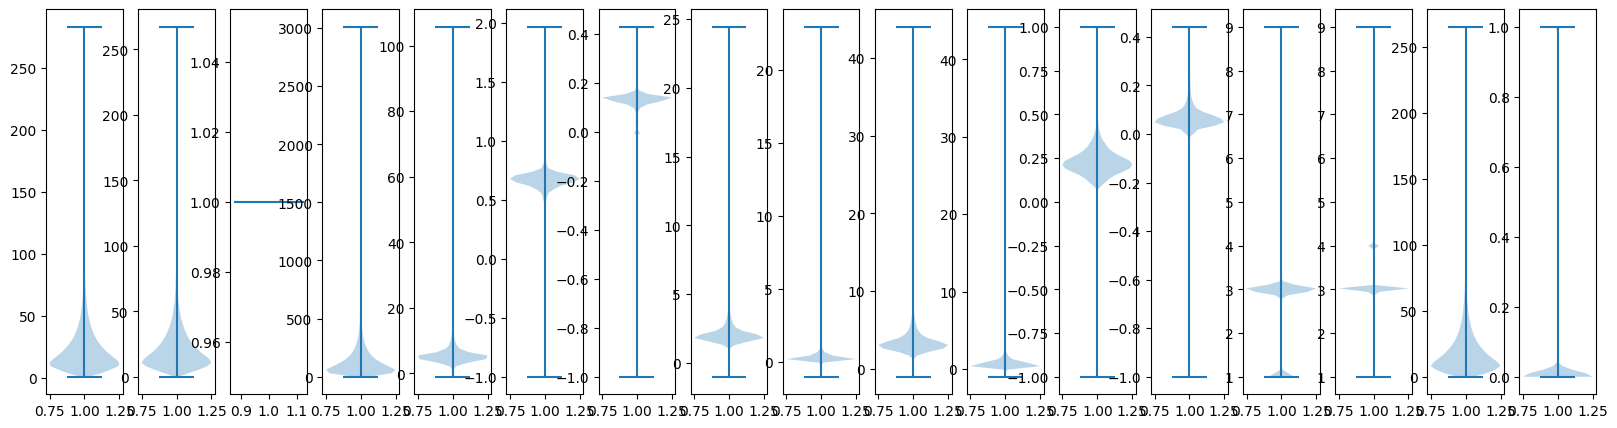

In [35]:
# use violin plots to show the distribution of the features

# select 10% of the data at random

np.random.seed(42)
indices = np.random.choice(node_tensors["graph_1"].shape[0], int(node_tensors["graph_1"].shape[0] * 0.1), replace=False)
example_fraction = node_tensors["graph_1"][indices, :]

# plot distributions for all node features
fig, axs = plt.subplots(1, example_fraction.shape[1], figsize=(20, 5))

for i in range(example_fraction.shape[1]):
    axs[i].violinplot(example_fraction[:, i])

plt.show()



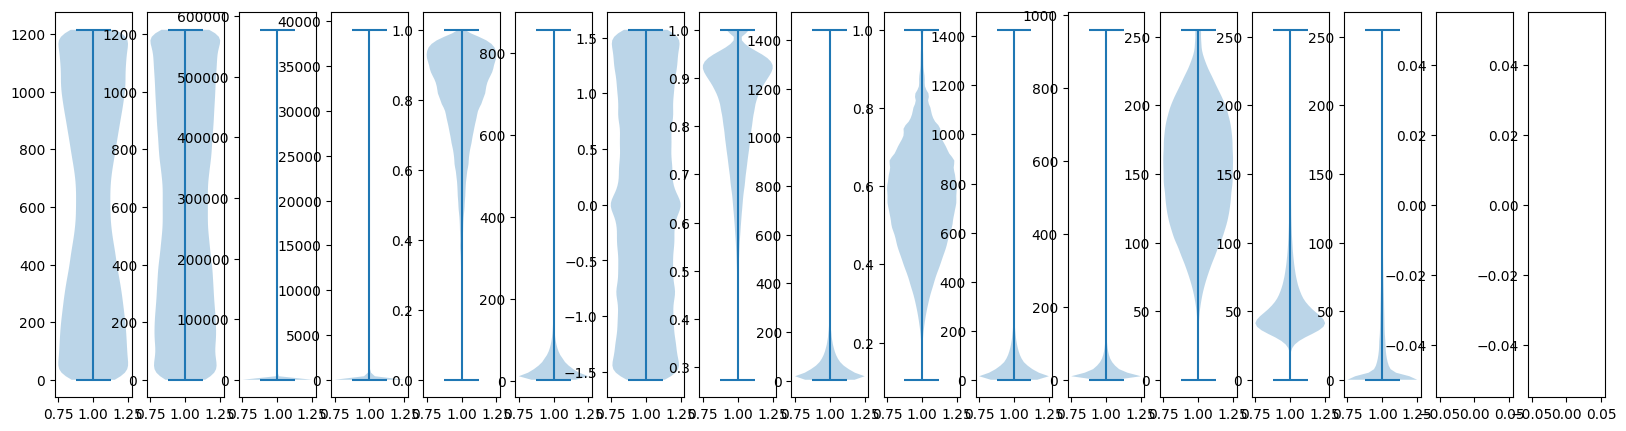

In [11]:
# use violin plots to show the distribution of the features


# plot distributions for all node features
fig, axs = plt.subplots(1, node_tensors["graph_2"].shape[1], figsize=(20, 5))

for i in range(node_tensors["graph_2"].shape[1]):
    axs[i].violinplot(node_tensors["graph_2"][:, i])

plt.show()

In [31]:
nan_pos = torch.where(torch.isinf(node_tensors["graph_2"]))
nan_pos

(tensor([], dtype=torch.int64), tensor([], dtype=torch.int64))

In [22]:
node_tensors["graph_2"][:, 16].nanmean()

tensor(615.5863)

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f4dac15bcd0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f4dac0ad2a0>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f4db1e7e8f0>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f4db1e91f90>}

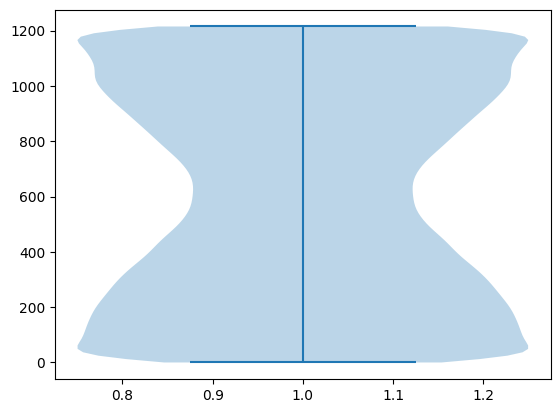

In [30]:
plt.violinplot(node_tensors["graph_2"][:, 15])